# STAT 301 - Final Report
-----
- Faraz Hosseinian-Tehrani (57277188)
- Tarvin Kaur Arora (64493513)
- Jiaqi Teng (48426019)
- Kevin Cheng (58605734)

### 1. Data Description

Our dataset is derived from the Cleveland Heart Disease dataset from the University of California, Irvine (UCI) Machine Learning Repository. It was curated and provided by Kaggle user *johnsmith88*, and was downloaded from [here](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset).

The main purpose of this dataset is to enable research surrounding classification of coronary heart disease.

| Variable | Type | Description | Values or Examples |
| - | - | - | - |
| age | Numeric | Age of patient, in years | Integers, continuous (ranges 29 to 77) |
| sex | Binary | Sex of patient | 0 = Female, 1 = Male |
| cp | Categorical | Type of chest pain | 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic |
| trestbps | Numeric | Resting blood pressure in mm Hg when admitted to hospital | Integers, continuous (ranges 94 to 200) |
| chol | Numeric | Serum cholesterol level in mg/dL | Integers, continuous (ranges 126 to 564) |
| fbs | Binary | Fasting blood sugar > 120 mg/dL | 0 = False, 1 = True |
| restecg | Categorical | Resting electrocardiographic results | 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy |
| thalach | Numeric | Maximum heart rate achieved | Integers, continuous (ranges 71 to 202) |
| exang | Binary | Exercise-induced angina | 0 = No, 1 = Yes |
| oldpeak | Numeric | ST depression induced by exercise relative to rest | Real numbers, continuous (ranges 0 to 6.2) |
| slope | Categorical | Slope of the peak exercise ST segment | 0 = Upsloping, 1 = Flat, 2 = Downsloping |
| ca | Categorical | Number of major vessels colored by fluoroscopy | 0, 1, 2, 3 |
| thal | Categorical | Thalassemia (blood disorder) | 1 = normal, 2 = fixed defect, 3 = reversable defect |
| target | Binary | Diagnosis of heart disease (target) | 0 = No disease, 1 = Disease |

Our dataset has $1025$ total observations.

### 2. Question

**Question of Interest**: How do lifestyle-related factors including type of chest pain, resting blood pressure, cholesterol level, fasting blood sugar, resting ECG results, and maximum heart rate help predict the presence of heart disease within men and women?

### 3. Exploratory Data Analysis and Visualization

In [1]:
library(ggplot2)
library(GGally)
library(dplyr)
library(corrplot)
library(tidyr)
library(caret)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Loading required package: lattice



In [2]:
heart_data <- read.csv("heart.csv")

In [3]:
heart_clean <- heart_data %>%
    select(target, sex, cp, trestbps, chol, fbs, restecg, thalach)

head(heart_clean)

,target,sex,cp,trestbps,chol,fbs,restecg,thalach
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,1,0,125,212,0,1,168
2,0,1,0,140,203,1,0,155
3,0,1,0,145,174,0,1,125
4,0,1,0,148,203,0,1,161
5,0,0,0,138,294,1,1,106
6,1,0,0,100,248,0,0,122


In [4]:
# Main developer: Tarvin
# Contributors: Faraz
women_data <- subset(heart_clean, sex == 0) %>% select(-sex)
men_data <- subset(heart_clean, sex == 1) %>% select(-sex)

head(women_data)
head(men_data)

,target,cp,trestbps,chol,fbs,restecg,thalach
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5,0,0,138,294,1,1,106
6,1,0,100,248,0,0,122
11,1,0,112,149,0,1,125
12,0,0,132,341,1,0,136
13,1,1,118,210,0,1,192
16,1,1,118,210,0,1,192


,target,cp,trestbps,chol,fbs,restecg,thalach
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,125,212,0,1,168
2,0,0,140,203,1,0,155
3,0,0,145,174,0,1,125
4,0,0,148,203,0,1,161
7,0,0,114,318,0,2,140
8,0,0,160,289,0,0,145


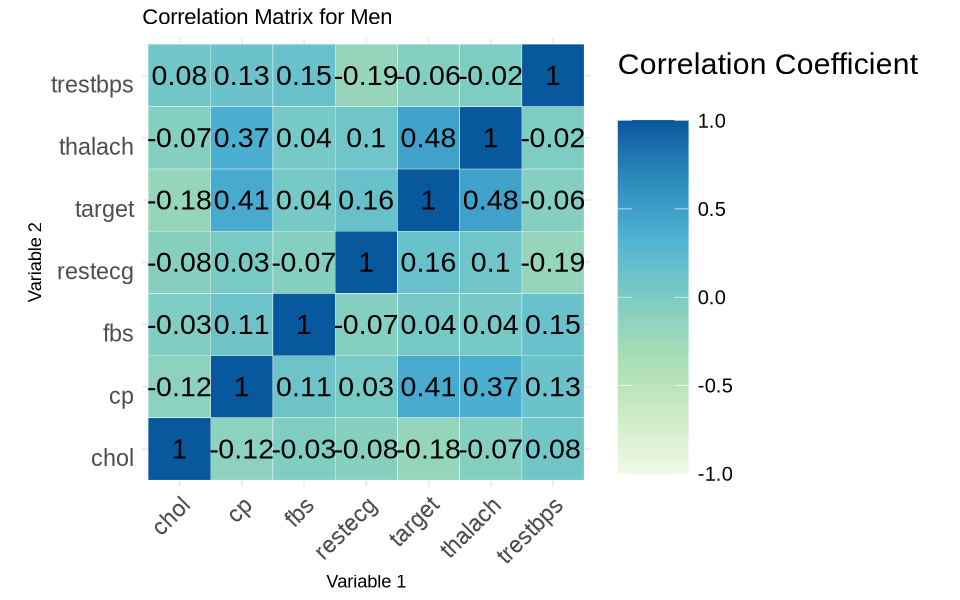

In [5]:
# Main developer: Tarvin
options(repr.plot.width = 8, repr.plot.height = 5) 

men_corr_matrix <- 
   men_data %>%
   cor() %>%
   as_tibble(rownames = 'var1') %>%
   pivot_longer(-var1, names_to = "var2", values_to = "corr")

plot_men_corr_matrix <- 
  men_corr_matrix %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
      palette = "GnBu",
      direction = 1, 
      limits = c(-1,1)
    ) +
    labs(x = "Variable 1", y = "Variable 2") +
    ggtitle("Correlation Matrix for Men") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm")
    ) +
    coord_fixed() +
   geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)

plot_men_corr_matrix

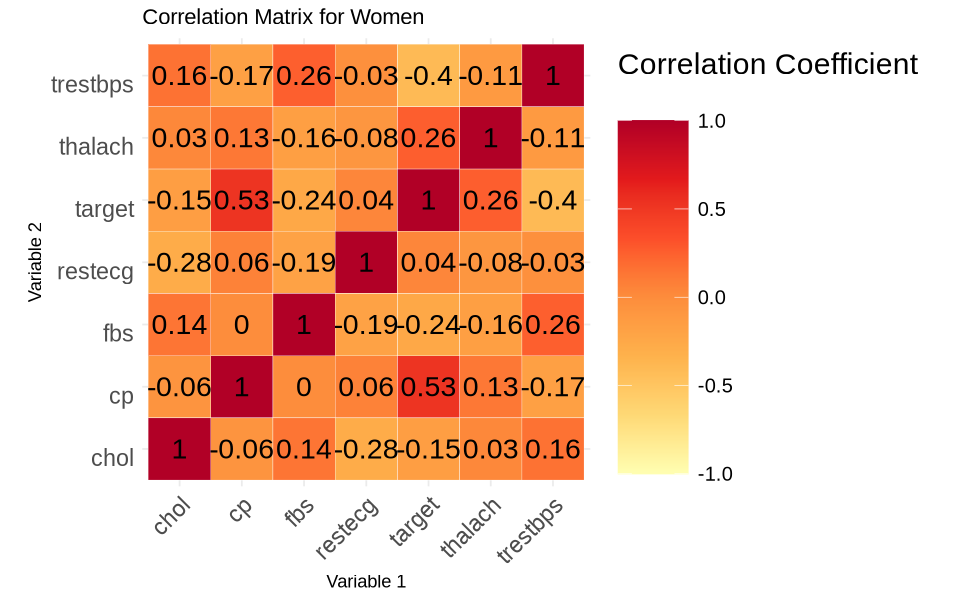

In [6]:
# Main developer: Tarvin
options(repr.plot.width = 8, repr.plot.height = 5) 

women_corr_matrix <- 
   women_data %>%
   cor() %>%
   as_tibble(rownames = 'var1') %>%
   pivot_longer(-var1, names_to = "var2", values_to = "corr")

plot_women_corr_matrix <- 
  women_corr_matrix %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
      palette = "YlOrRd",
      direction = 1, 
      limits = c(-1,1)
    ) +
    labs(x = "Variable 1", y = "Variable 2") +
    ggtitle("Correlation Matrix for Women") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm")
    ) +
    coord_fixed() +
   geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)

plot_women_corr_matrix

### 4. Methods

- Kevin

### 5. Computation (Building Model)

First, we can fit the logistic regression models on our data, building two separate models for `men_data` and `women_data`. 

In [7]:
# Main developer: Faraz
men_model <- glm(
    target ~ ., 
    data = men_data, 
    family = binomial
)

women_model <- glm(
    target ~ ., 
    data = women_data, 
    family = binomial
)

Using `ifelse()` with a threshold of $0.5$, we can sort our class predictions into a binary response, which is the ideal form to compare with our target.

In [8]:
# Main developer: Faraz
men_predictions <- predict(men_model, type = "response")
men_predicted_classes <- ifelse(men_predictions > 0.5, 1, 0)

women_predictions <- predict(women_model, type = "response")
women_predicted_classes <- ifelse(women_predictions > 0.5, 1, 0)

Then, we can build confusion matrices, and output the resulting accuracies.

In [9]:
# Main developer: Faraz
men_conf_matrix <- confusionMatrix(
    factor(men_predicted_classes), 
    factor(men_data$target)
)

women_conf_matrix <- confusionMatrix(
    factor(women_predicted_classes), 
    factor(women_data$target)
)

# Accuracies
men_accuracy <- men_conf_matrix$overall['Accuracy']
women_accuracy <- women_conf_matrix$overall['Accuracy']

men_accuracy
women_accuracy

Accuracy 
0.772791

Accuracy 
   0.875

As the output above shows, `men_accuracy` is equal to approximately $77.28\%$ and `women_accuracy` is equal to $87.5\%$.

Finally, let's visualize the confusion matrices.

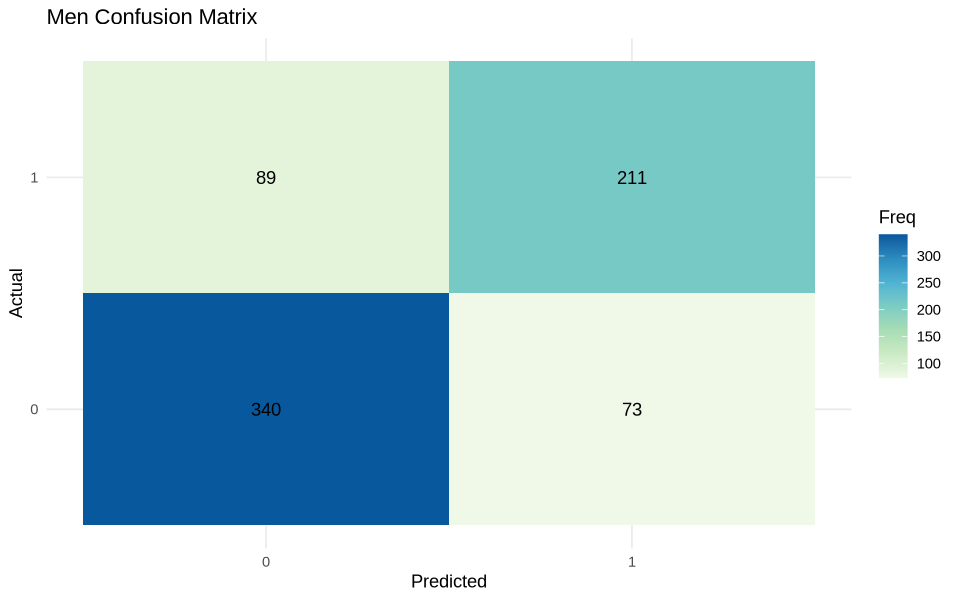

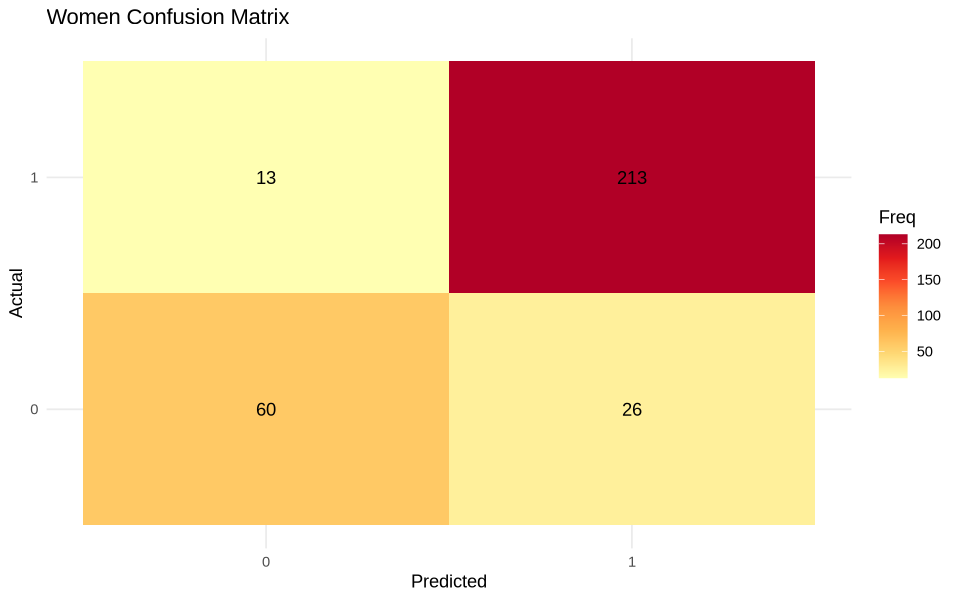

In [10]:
# Main developer: Faraz
men_conf_matrix_df <- as.data.frame(as.table(men_conf_matrix$table))
ggplot(men_conf_matrix_df, aes(x = Prediction, y = Reference, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), color = "black") +
    scale_fill_distiller(palette = "GnBu", direction = 1) +
    labs(x = "Predicted", y = "Actual", title = "Men Confusion Matrix") +
    theme_minimal()

women_conf_matrix_df <- as.data.frame(as.table(women_conf_matrix$table))
ggplot(women_conf_matrix_df, aes(x = Prediction, y = Reference, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), color = "black") +
    scale_fill_distiller(palette = "YlOrRd", direction = 1) +
    labs(x = "Predicted", y = "Actual", title = "Women Confusion Matrix") +
    theme_minimal()

As seen in the confusion matrices above:
- Our model correctly predicted 211 men to have heart disease and 340 men to not have heart disease, while incorrectly classifying 73 false positives and 89 false negatives.
- Our model correctly predicted 213 women to have heart disease and 60 women to not have heart disease, while incorrectly classifying 26 false positives and 13 false negatives.

### 6. Discussion

- Grace

### 7. References

Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1989). Heart Disease [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.